In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import feature_selection as f_select
import os.path
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from scipy import stats, integrate
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from pydoc import help
from scipy.stats.stats import pearsonr

In [5]:
#Retrieve dataset

In [6]:
df=(r'C:\Users\abrah\OneDrive\Desktop\Data Science projects\Vehicles\CarsFinal.csv')
pd.read_csv(df)
cars=pd.read_csv(df)

In [7]:
#Car Price distribution plot

C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


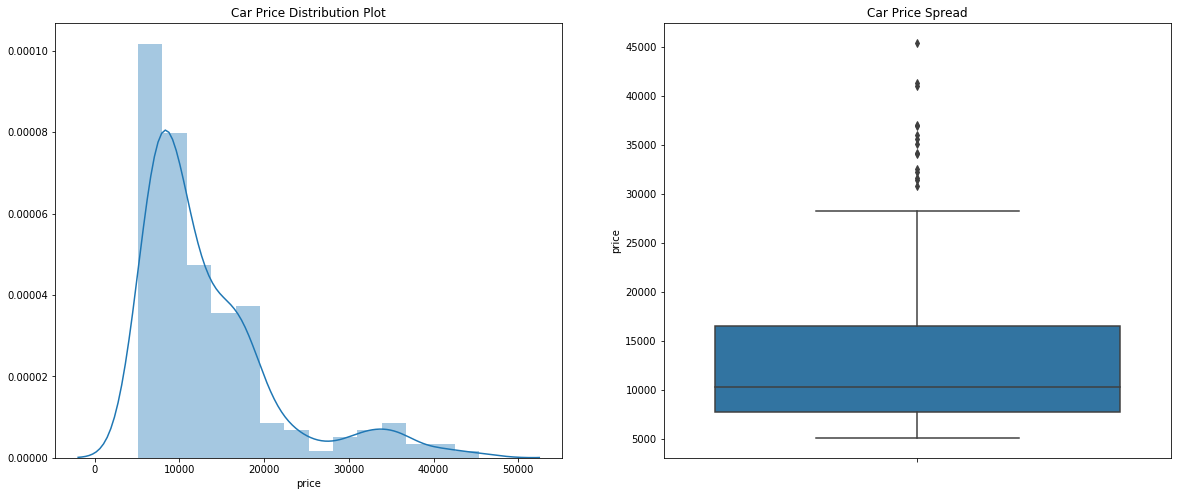

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [9]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [10]:
#The plot is skewed to the right. Most of the car prices are below 15,000.
#The data points are spread out from the mean, indicating a high variance in car prices.

In [11]:
#Getting counts of each manufacturer

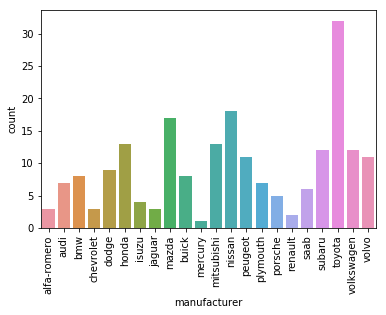

In [12]:
ax = sns.countplot(x="manufacturer", data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [13]:
#fuel type histogram

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

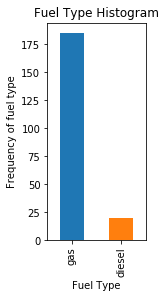

In [14]:
plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

In [15]:
#most of the cars use gas instead of diesel

In [16]:
#car type histogram

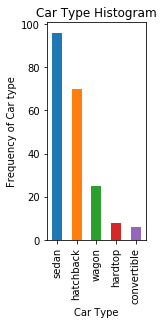

In [17]:
plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


In [18]:
#Sedan is the most common car type followed by hatchback

In [19]:
#fuel type vs average price

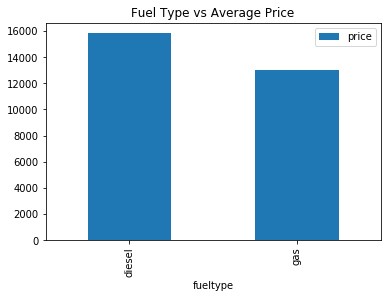

In [20]:
df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

In [21]:
#diesel has higher average price than gas.

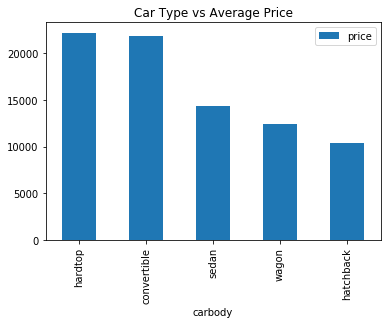

In [22]:
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [23]:
#2.	hardtop and convertible have higher average price than other cars

In [24]:
#Visualising numerical data

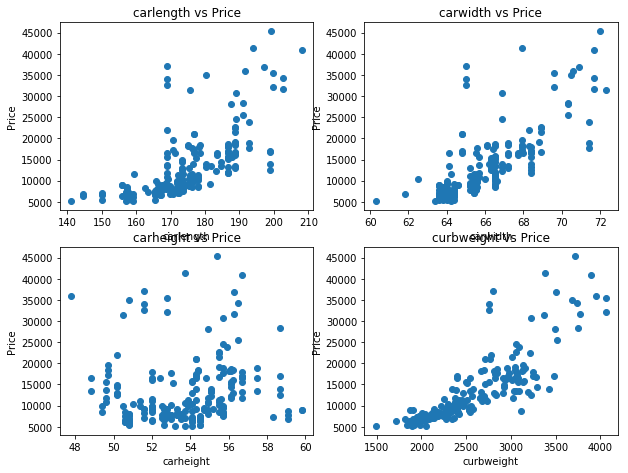

In [25]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout
plt.show()

In [26]:
#carwidth, carlength and curbweight have a positive correlation with price.
#carheight doesn't show any significant trend with price.

In [27]:
#histogram

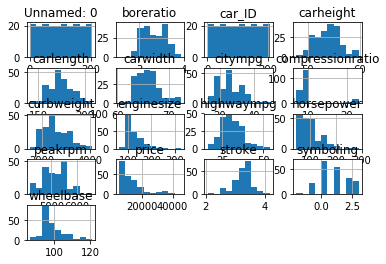

In [29]:
cars.hist()
plt.show()

In [30]:
#Pearson correlation

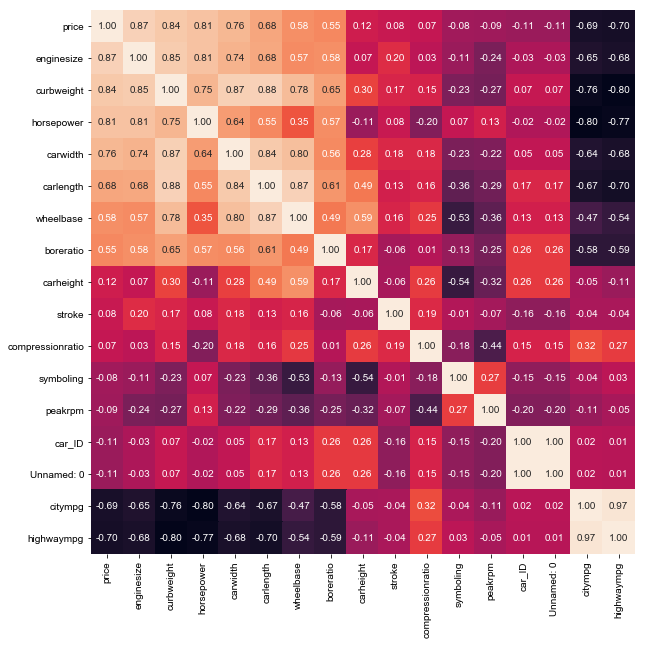

In [31]:
corrmat = cars.corr(method='pearson', min_periods=1)
k = 26
cols = corrmat.nlargest(k,'price')['price'].index
cm = cars[cols].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
#These are the attributes that are positively correlated variables with Price: wheelbase, carlenght, carwidth, curbweight, enginesize, boreratio, horesepower

In [33]:
#These are the attributes that are negatively correlated variables with Price: citympg, highwaympg